# Data Preprocessing and Preparation 


**Step 1**
- Create a new project page in github and put the downloaded image files into a subfolder in this new git hub repository
- Configure your .gitignore file so that the images folder will not be uploaded to the git repository 
(https://help.github.com/en/github/using-git/ignoring-files)


**Step 2**

The image dataset that you downloaded from GoogleDrive has 2 folders with 100 images in them. In this step we will read this images to a dataarrays, visualize them, resize the images and do some comparisons between them. 

Use glob library from python to get a list of all the images in the folders.


In [1]:
#your code comes here
import glob
import os
flist_Set1 = glob.glob("/Users/jacob/Programs/Dermoscopy-Work/Dataset/Example_Images/Set1/*.jpg")
flist_Set2 = glob.glob("/Users/jacob/Programs/Dermoscopy-Work/Dataset/Example_Images/Set2/*.jpg")
print(flist_Set1[0])

/Users/jacob/Programs/Dermoscopy-Work/Dataset/Example_Images/Set1/ISIC_0099348.jpg


In [2]:
for x in flist_Set1:
    fname,ext = os.path.splitext(os.path.basename(x))
    print(fname)

ISIC_0099348
ISIC_0131978
ISIC_0195995
ISIC_0112420
ISIC_0143109
ISIC_0183449
ISIC_0169906
ISIC_0148937
ISIC_0193289
ISIC_0126432
ISIC_0155813
ISIC_0204399
ISIC_0161963
ISIC_0153127
ISIC_0082785
ISIC_0052349
ISIC_0178428
ISIC_0150213
ISIC_0192807
ISIC_0115798
ISIC_0165928
ISIC_0191895
ISIC_0188485
ISIC_0166561
ISIC_0154289
ISIC_0192184
ISIC_0183658
ISIC_0177083
ISIC_0058510
ISIC_0158761
ISIC_0196622
ISIC_0169378
ISIC_0165230
ISIC_0165178
ISIC_0114232
ISIC_0108196
ISIC_0180057
ISIC_0206261
ISIC_0196807
ISIC_0171865
ISIC_0077586
ISIC_0105104
ISIC_0052060
ISIC_0183771
ISIC_0092481
ISIC_0090283
ISIC_0142066
ISIC_0198622
ISIC_0178258
ISIC_0148210
ISIC_0205627
ISIC_0131912
ISIC_0198376
ISIC_0196159
ISIC_0157088
ISIC_0087243
ISIC_0085332
ISIC_0165615
ISIC_0197440
ISIC_0165617
ISIC_0169575
ISIC_0168125
ISIC_0175014
ISIC_0199718
ISIC_0088167
ISIC_0175798
ISIC_0097719
ISIC_0073313
ISIC_0101383
ISIC_0131485
ISIC_0095455
ISIC_0204875
ISIC_0197860
ISIC_0073502
ISIC_0139322
ISIC_0187786
ISIC_0174800

Use any image processing library (e.g. PILLOW, openCV) to read an image from Set1

In [3]:
#your code comes here
from PIL import Image
last=Image.open(flist_Set1[-1])

Use matplotlib library to visualize one image from each dataset.

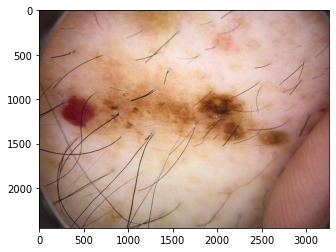

In [4]:
#your code comes here
import matplotlib.pyplot as plt
%matplotlib inline
imgplot = plt.imshow(last)

Now we will create a dataset from the images that you have. So, lets imagine, images in Set1 are benign lesions and Set2 are malignant lesions. So our aim is (i) resize all the images, (ii) write them to a new folder all together, (iii) create a csv file which has file names in one column and labels (benign vs malignant) in the second column

We will keep all the resized images in a new folder. So create a new folder called "Resized_Dataset" under your current folder. You can use "os" library in python to accomplish this task. Add the name of this new folder to your gitignore file so that it will not be uploaded to github. 

In [5]:
#your code comes here
#create folder
import os
dest = '/Users/jacob/Programs/Dermoscopy-Work/Dataset/Resized_Dataset'
if os.path.isdir(dest)==0:
    os.mkdir(dest)

**Dataset Preperation**

The images in the dataset are too bit to be processed by a machine learning model. So we would like to resize to a more managible size. 

We would like to resize each image in the dataset to 512px at their longest dimension (height or width) without chaging the aspect ratio. This may result in rectangle shapes images whose shorter size smaller than 512px. We would like all our images to be square shaped. Therefore, pad black pixels (zero values) to both sides of the short edge dimension to make the images 512-by-512. Then write these resized images to the new folder that you created above. 

Do not forget to keep track of where you read the images from (set1 or set2) as that information will be used as labels. I suggest you to keep a pandas dataframe, in which you keep the filenames and the labels as 2 seperate dataentries (Set1 = Benign, Set2 = Malignant). This dataframe will be very similar to the one that you used in the Coursera Assignment (see below)

|	|Filename|	Label |
| ------------- |:-------------:| -----:|
0	|1.jpg	|Malignant 
1	|2.jpg	|Malignant 
2	|3.jpg	|Benign
3	|4.jpg	|Benign
4	|5.jpg	|Malignant


In [10]:
import pandas as pd
from PIL import ImageOps, Image
filenames=[]
labels=[]
directories = [flist_Set1,flist_Set2]
for setNo, direc in enumerate(directories):
    for x in direc:
        fname,ext = os.path.splitext(os.path.basename(x))
        filenames.append(fname)
        if setNo == 0:
            labels.append("Benign")
        else:
            labels.append("Malignant")

'''
for x in flist_Set1:
    fname,ext = os.path.splitext(os.path.basename(x))
    filenames.append(fname)
    labels.append("Benign")
for x in flist_Set2:
    fname,ext = os.path.splitext(os.path.basename(x))
    filenames.append(fname)
    labels.append("Malignant")
print(len(labels))
print(len(filenames))

imageorig=Image.open(x)
print("Dimensions of original image:", imageorig.size)
origw=imageorig.width
origh=imageorig.height
if origw>=origh:
    maxDimension=origw
else:
    maxDimension=origh
print("Larger dimension:",maxDimension)
downratio=maxDimension/512
print("Downscaling ratio:", downratio)
targetw=int(origw/downratio)
targeth=int(origh/downratio)
imageres=imageorig.resize((targetw, targeth))
print("Resized image dimensions:", imageres.size)
paddingorigw=512-targetw
paddingorigh=512-targeth
print("Original padding amounts:", paddingorigw, ",", paddingorigh)
paddingactw=int(paddingorigw/2)
paddingacth=int(paddingorigh/2)
print("Actual padding amounts:", paddingactw, ",", paddingacth)
finalw=imageres.width+paddingactw*2
finalh=imageres.height+paddingacth*2
imagefinal = ImageOps.expand(imageres, border=(paddingactw,paddingacth,paddingactw,paddingacth),fill=0)
print("Final dimensions:", imagefinal.size)
imgplot = plt.imshow(imagefinal)
plt.show()
'''

data = {'Filename': filenames,
        'Label': labels}
DF = pd.DataFrame (data, columns = ['Filename','Label'])
print(DF)
DF.to_csv("BenignDataframe.csv")
#Save images to Resized Dataset folder

         Filename      Label
0    ISIC_0099348     Benign
1    ISIC_0131978     Benign
2    ISIC_0195995     Benign
3    ISIC_0112420     Benign
4    ISIC_0143109     Benign
..            ...        ...
195           152  Malignant
196           153  Malignant
197           147  Malignant
198           190  Malignant
199           184  Malignant

[200 rows x 2 columns]


**Dataset Cleaning**

Unfortunately there is a problem in your dataset. While preparing the data, I made an -intentional :)- mistake and put 9 benign images (set1) in the malignant folder (set2). Luckily these same benign images that are mistakenly put in malignant folder also exist in the benign folder. So check if any image in malignant folder, also exists in the benign folder. Unfortunately you can not do this comparison using file names, so you need to compare each image pixel-wise. 

I suggest you to first write a pseudo code (steps of how you would like to implement this) below and run by me.

In [16]:
import glob
from PIL import Image
import numpy as np
import pathlib
from tqdm import tqdm
## Find the list of images in the benign folder (e.g. glob command) and call it f_benign
#your code comes here.
f_benign=flist_Set1
#print("Benign Images:")
for x in f_benign:
    fname,ext = os.path.splitext(os.path.basename(x))
    #print(fname)
## Find the list of images in the malignant folder (e.g. glob command) and call it f_malignant
#your code comes here.
f_malignant=flist_Set2
#print("Malignant Images:")
for x in f_malignant:
    fname,ext = os.path.splitext(os.path.basename(x))
    #print(fname)
## Now will import all benign images into a numpy array. For ease of processing
## we will downsample the images to 256-by-256 (do not need to preserve the aspect ratio),
## and then store them in a numpy array.
for x in f_benign:
    fname,ext = os.path.splitext(os.path.basename(x))
## Find how many images are there in the benign images folder
#your code comes here.
countB = len(flist_Set1)
countM = len(flist_Set2)
#print("Benign Image Count:", count)
## Initialize a 4 dimensional (4D) empty numpy array of zeros. The size of the array should be [256,256,3,numImg]
#your code comes here.
BenignArray=np.zeros((256, 256, 3, countB))
## Write a for loop to read images in the benign folder one by one.
    ## read an image from benign folder
    ## resize the image
    ## write the image into the numpy array
    #your code comes here.
for countB2, x in tqdm(enumerate(f_benign)):
    Benignorig=Image.open(x)
    Benignres=Benignorig.resize((256, 256))
    BenignArray[:, :, :, countB2]=np.array(Benignres)/255

    


100it [00:32,  3.08it/s]
100it [00:30,  3.30it/s]


'\nPsuedo Idea #1:\nfor x in BenignArray, set (:, :, :, x) equal to i\nfor x in MalignantArray, set (:, :, :, x) equal to j\nif i=j, stop loop, and add (i, j) to matched list\n- Issues: countB2 and countM2 will always be the same?\n\nPsuedo Idea #2:\nfor x in f_benign, set x equal to i\nfor x in f_malignant, set x equal to j\nif i=j, stop loop\nfind the value of countB2 and countM2 for i/j\nadd (i, j) to matched list\n- Issues: names would most likely not match?\n'

In [31]:
## We now need to compare the images (one by one) in the malignant folder against the benign images
## create an empty list
#your code comes here.
matched=[]
MalignantArray=np.zeros((256, 256, 3, countM))

## Write a for loop to read each of the images in the malignant folder.
#your code comes here.
for countM2, x in tqdm(enumerate(f_malignant)):
    Malignantorig=Image.open(x)
    Malignantres=np.array(Malignantorig.resize((256, 256)))/255
    
    for number in range(BenignArray.shape[-1]):   
        tmp = BenignArray[:, :, :, number]
        if np.sum(tmp - Malignantres)==0:
            matched.append((countM2,number))
print(matched)
'''
    MalignantArray[:, :, :, countM2]
    ## read an image from malignant folder
    #your code comes here.
for num in range(len(flist_Set1)):
    x = BenignArray[:, :, :, num]
    plt.imshow(x)
    plt.show()
    ## resize the image
    #your code comes here.
    ##compare against all the benign images one-by-one
    ## write a for loop that goes through the numpy array
    #your code comes here.
        ## compare imgs[:,:,:,j] and current image “tmp” (HINT: their different should be 0 if they are same)
        #your code comes here.
            ## if they are same append the match (i,j) to the “matched” list
            #your code comes here.
'''

#Use the matched list to delete the benign images in the malignant folder
#your code comes here.

100it [00:46,  2.15it/s]

[(4, 27), (5, 69), (8, 67), (34, 2), (37, 22), (40, 36), (63, 93), (67, 29), (77, 86)]


'\n    MalignantArray[:, :, :, countM2]\n    ## read an image from malignant folder\n    #your code comes here.\nfor num in range(len(flist_Set1)):\n    x = BenignArray[:, :, :, num]\n    plt.imshow(x)\n    plt.show()\n    ## resize the image\n    #your code comes here.\n    ##compare against all the benign images one-by-one\n    ## write a for loop that goes through the numpy array\n    #your code comes here.\n        ## compare imgs[:,:,:,j] and current image “tmp” (HINT: their different should be 0 if they are same)\n        #your code comes here.\n            ## if they are same append the match (i,j) to the “matched” list\n            #your code comes here.\n'

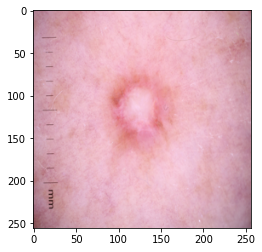

In [17]:
plt.imshow(MalignantArray[:, :, :, 0])